|Faculdade |Curso|Disciplina |Professor|Ano|
| :- | :- | :- | :- | :- |
|Estácio de São Paulo|ADS|Tópicos de Big Data em Python|Prof. Fabio Oliveira|2025|

# 📊 Análise de Dados para Otimização de Investimentos

### 🎯 Perguntas de Negócios 

1. O Orçamento Alto (Blockbuster) é o caminho mais lucrativo ou o mais eficiente?

2. Qual é o verdadeiro indicador de sucesso global?

3. Nossa base de produção está alinhada com as categorias mais representadas no mercado?

4. O investimento em filmes para o Oscar se paga comercialmente?

5. Como o mercado de filmes mudou nas últimas décadas?

6. Qual gênero oferece o melhor Retorno Percentual (ROI) atualmente?

## 📘 Dicionário de Dados - Dataset IMDb

Este dicionário descreve as colunas (campos) contidas no dataset de filmes do IMDb utilizado neste projeto. Ele detalha o nome do campo, o tipo de dado esperado e uma breve descrição.

| Campo | Tipo de Dado | Descrição | Dominio |
| :--- | :--- | :--- | :--- |
| **id** | Texto (string) | Identificador único do filme no IMDb (formato `tt1234567`) | `tt0073470` |
| **title** | Texto (string) | Título do filme | `Strip Nude for Your Killer` |
| **link** | URL (Texto) | Link direto para a página do filme no IMDb | `https://www.imdb.com/...` |
| **year** | Número (Inteiro) | Ano de lançamento do filme | `1975` |
| **duration** | Texto | Duração do filme no formato horas e minutos | `1h 38m` |
| **rating_mpa** | Texto | Classificação indicativa (MPAA Rating) | `PG, R, Not Rated, etc.` |
| **rating_imdb** | Número (decimal) | Nota média do filme no IMDb | `6.6` |
| **vote** | Número (Inteiro) | Número de votos recebidos no IMDb | `11000` |
| **budget** | Número (Inteiro) | Orçamento de produção (em dólares) | `535000` |
| **gross_world_wide** | Número (Inteiro) | Receita bruta mundial | `41687243` |
| **gross_us_canada** | Número (Inteiro) | Receita bruta nos EUA e Canadá | `33500000` |
| **gross_opening_weekend** | Número (Inteiro) | Receita bruta na semana de estreia mundial | `2040920` |
| **director** | Texto | Nome do(a) diretor(a) do filme | `Andrea Bianchi` |
| **writer** | Texto | Nome(s) do(s) roteirista(s) | `Edwig Fenech` |
| **star** | Texto | Nome(s) do(s) ator(es)/atriz(es) principal(is) | `Andrea Bianchi` |
| **genre** | Texto | Gênero principal do filme | `Erotic, Drama, etc.` |
| **country_origin** | Texto | País de produção | `Italy, United States` |
| **production_company** | Texto | Companhia ou estúdio responsável pela produção | `Milan, United Artists` |
| **production_language** | Texto | Idioma principal do filme | `Italian, English, etc.` |
| **nominee** | Número (Inteiro) | Número de indicações a prêmios | `0, 1, 2, etc.` |
| **oscar** | Número (Inteiro) | Número de Oscars ganhos | `0, 1, etc.` |

# 🏛️ Bibliotecas

In [1]:
# ===============================
#  Importando Bibliotecas Python
# ===============================

import pandas as pd # importa a biblioteca pandas com o apelido pd usada para manipulação de dados
import numpy as np # importa a biblioteca numpy com o apelido np usada para operações numéricas
import matplotlib.pyplot as plt # importa a biblioteca matplotlib.pyplot com o apelido plt usada para visualização de dados
import seaborn as sns # importa a biblioteca seaborn com o apelido sns usada para visualização de dados estatísticos
import re # importa a biblioteca re para expressões regulares usadas em manipulação de strings
from datetime import datetime # importa a classe datetime do módulo datetime usada para manipulação de datas e horas
import textwrap # Para quebrar linhas longas no título do gráfico
import matplotlib.ticker as ticker # Para formatar o eixo Y
from matplotlib.ticker import FuncFormatter
from IPython.display import display # Importa a função display para o output formatado

In [2]:
#!pip install warnings

In [3]:
#!pip install tabulate

# 🧮 Funções 

In [4]:
# =========================================================
#  Criando funções que vão ser chamadas ao longo do código
# =========================================================

def explode_genres(df, genre_col='genre'): # Função explode faz a separação dos gêneros em linhas diferentes
    """
    Função recebe um DataFrame e retorna uma cópia com a coluna de gêneros explodida:
    - Remove espaços extras
    - Remove linhas com gênero vazio/nulo
    - Divide os gêneros por vírgula e explode em múltiplas linhas
    """
    df = df.copy() #cria uma cópia do DataFrame original para evitar alterações indesejadas
    df[genre_col] = df[genre_col].astype(str).str.strip().replace('', np.nan) # strip() remove espaços em branco no início e no fim, replace substitui strings vazias por NaN 
    df = df.dropna(subset=[genre_col]) #dropna remove linhas com valores NaN na coluna de gêneros
    df[genre_col] = df[genre_col].str.split(',')
    df = df.explode(genre_col)# explode divide os gêneros em múltiplas linhas
    df[genre_col] = df[genre_col].str.strip()
    return df

In [5]:
filmes_df = pd.read_excel("filmes.xlsx") #lê o arquivo excel e o renomeia filmes_df

In [6]:
filmes_df.head() #visualiza as 5 primeiras linhas 

,id,title,link,year,duration,rating_mpa,rating_imdb,vote,budget,gross_world_wide,...,writer,star,genre,country_origin,filming_location,production_company,language,win,nomination,oscar
0,tt0073470,Strip Nude for Your Killer,https://www.imdb.com/title/tt0073470,1975,1h 38m,Not Rated,2025-06-05 00:00:00,33000.0,NaN,NaN,...,"Andrea Bianchi, Massimo Felisatti","Edwige Fenech, Nino Castelnuovo, Femi Benussi","Erotic Thriller, Giallo, Slasher Horror, Horro...",Italy,"Milan, Lombardia, Italy",FRAL Cinematografica,Italian,0.0,0,0
1,tt0072764,Carry on Behind,https://www.imdb.com/title/tt0072764,1975,1h 30m,Not Rated,2025-06-05 00:00:00,31000.0,NaN,NaN,...,Dave Freeman,"Elke Sommer, Kenneth Williams, Bernard Bresslaw","Parody, Slapstick, Comedy",United Kingdom,"Bad Godesberg Way, Maidenhead, Berkshire, Engl...","The Rank Organisation, Peter Rogers Productions",English,0.0,0,0
2,tt0131526,"So Young, So Lovely, So Vicious...",https://www.imdb.com/title/tt0131526,1975,1h 30m,NaN,2025-09-04 00:00:00,487.0,NaN,NaN,...,"Silvio Amadio, Roberto Natale","Gloria Guida, Dagmar Lassander, Fred Robsahm","Drama, Mystery, Thriller",Italy,"Sardinia, Italy",Domiziana Internazionale Cinematografica,Italian,0.0,0,0
3,tt0073335,Mahogany,https://www.imdb.com/title/tt0073335,1975,1h 49m,PG,2025-01-06 00:00:00,23000.0,NaN,NaN,...,"John Byrum, Toni Amber","Diana Ross, Billy Dee Williams, Anthony Perkins","Drama, Romance",United States,Marshall Field Co Department Store 111 N Sta...,"Motown Productions, Nikor Productions, Paramou...","English, Italian",0.0,0,1
4,tt0073006,Foreplay,https://www.imdb.com/title/tt0073006,1975,1h 15m,R,4,185.0,NaN,NaN,...,"Dan Greenburg, Jack Richardson, Bruce Jay Frie...","Irwin Corey, Pat Paulsen, Deborah Loomis","Parody, Satire, Sketch Comedy, Comedy",United States,NaN,SynFrank Enterprises,English,0.0,0,0


# 📋 Padronização dos nomes das colunas

In [7]:
# ===================================
# Padronização dos nomes das colunas
# ===================================

# Remove espaços extras no início/fim de cada nome
filmes_df.columns = (
    filmes_df.columns
    .str.strip() #remove espaços em branco no início e no fim dos nomes das colunas
    .str.lower() #converte todos os nomes das colunas para minúsculas
    .str.replace(' ', '_') #substitui espaços por underline (_)
    .str.replace('-', '_') #substitui hífens por underline (_)
)

In [8]:
# Visualiza as 5 primeiras linhas 
filmes_df.head() 

,id,title,link,year,duration,rating_mpa,rating_imdb,vote,budget,gross_world_wide,...,writer,star,genre,country_origin,filming_location,production_company,language,win,nomination,oscar
0,tt0073470,Strip Nude for Your Killer,https://www.imdb.com/title/tt0073470,1975,1h 38m,Not Rated,2025-06-05 00:00:00,33000.0,NaN,NaN,...,"Andrea Bianchi, Massimo Felisatti","Edwige Fenech, Nino Castelnuovo, Femi Benussi","Erotic Thriller, Giallo, Slasher Horror, Horro...",Italy,"Milan, Lombardia, Italy",FRAL Cinematografica,Italian,0.0,0,0
1,tt0072764,Carry on Behind,https://www.imdb.com/title/tt0072764,1975,1h 30m,Not Rated,2025-06-05 00:00:00,31000.0,NaN,NaN,...,Dave Freeman,"Elke Sommer, Kenneth Williams, Bernard Bresslaw","Parody, Slapstick, Comedy",United Kingdom,"Bad Godesberg Way, Maidenhead, Berkshire, Engl...","The Rank Organisation, Peter Rogers Productions",English,0.0,0,0
2,tt0131526,"So Young, So Lovely, So Vicious...",https://www.imdb.com/title/tt0131526,1975,1h 30m,NaN,2025-09-04 00:00:00,487.0,NaN,NaN,...,"Silvio Amadio, Roberto Natale","Gloria Guida, Dagmar Lassander, Fred Robsahm","Drama, Mystery, Thriller",Italy,"Sardinia, Italy",Domiziana Internazionale Cinematografica,Italian,0.0,0,0
3,tt0073335,Mahogany,https://www.imdb.com/title/tt0073335,1975,1h 49m,PG,2025-01-06 00:00:00,23000.0,NaN,NaN,...,"John Byrum, Toni Amber","Diana Ross, Billy Dee Williams, Anthony Perkins","Drama, Romance",United States,Marshall Field Co Department Store 111 N Sta...,"Motown Productions, Nikor Productions, Paramou...","English, Italian",0.0,0,1
4,tt0073006,Foreplay,https://www.imdb.com/title/tt0073006,1975,1h 15m,R,4,185.0,NaN,NaN,...,"Dan Greenburg, Jack Richardson, Bruce Jay Frie...","Irwin Corey, Pat Paulsen, Deborah Loomis","Parody, Satire, Sketch Comedy, Comedy",United States,NaN,SynFrank Enterprises,English,0.0,0,0


In [9]:
# visualiza quantantidade de linhas e colunas exixtentes
filmes_df.shape

(2028, 23)

📌 **Info**

Verificando o tipo de dado inferido para cada coluna e a contagem de valores não-nulos usando o comando "info". Isso é crucial para identificar colunas que deveriam ser numéricas (como receita) mas foram lidas como objeto (string).

In [10]:
# Informa a quantidade de dados NÃO NULOS em cada coluna e o tipo do dado
filmes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   object 
 1   title                  2028 non-null   object 
 2   link                   2000 non-null   object 
 3   year                   2028 non-null   int64  
 4   duration               1991 non-null   object 
 5   rating_mpa             1533 non-null   object 
 6   rating_imdb            2017 non-null   object 
 7   vote                   1989 non-null   float64
 8   budget                 731 non-null    float64
 9   gross_world_wide       1079 non-null   float64
 10  gross_us_canada        1050 non-null   float64
 11  gross_opening_weekend  923 non-null    float64
 12  director               2011 non-null   object 
 13  writer                 1916 non-null   object 
 14  star                   1974 non-null   object 
 15  genr

# 📊 Análise Descritiva de Dados de Filmes

📌 **Método .describe()**

O método .describe() é fundamental para a exploração inicial de dados. Ele é aplicado a um DataFrame ou Series e gera um resumo estatístico das colunas numéricas da base de dados.

Ele calcula as seguintes estatísticas para cada coluna numérica:

    count: O número de valores não-nulos na coluna (quantos registros existem).

    mean: A média aritmética dos valores.

    std: O desvio padrão, que mede a dispersão dos dados em relação à média.

    min: O valor mínimo observado.

    25% (Q1): O primeiro quartil (25º percentil). 25% dos dados estão abaixo deste valor.

    50% (Q2 / median): O segundo quartil (50º percentil), que é a mediana.

    75% (Q3): O terceiro quartil (75º percentil). 75% dos dados estão abaixo deste valor.

    max: O valor máximo observado.

In [11]:
# Descreve os dados das colunas numéricas existentes na base de dados
filmes_df.describe()

,year,vote,budget,gross_world_wide,gross_us_canada,gross_opening_weekend,win,nomination,oscar
count,2028.000000,1.989000e+03,7.310000e+02,1.079000e+03,1.050000e+03,9.230000e+02,2000.0,2028.000000,2028.000000
mean,1992.541913,8.585263e+04,5.589218e+08,4.737316e+07,2.082497e+07,5.936713e+06,0.0,5.302268,0.137574
std,18.576386,8.802063e+05,1.120731e+10,1.524787e+08,5.829407e+07,1.747839e+07,0.0,19.657749,0.618182
min,1960.000000,7.000000e+00,7.500000e+03,1.000000e+00,4.620000e+02,1.070000e+02,0.0,0.000000,0.000000
25%,1977.000000,5.140000e+02,2.500000e+06,2.193745e+05,9.330850e+04,1.467300e+04,0.0,0.000000,0.000000
50%,1992.000000,1.500000e+04,1.100000e+07,2.719699e+06,1.058040e+06,1.215040e+05,0.0,0.000000,0.000000
75%,2009.000000,3.800000e+04,3.350000e+07,2.469604e+07,1.622694e+07,4.016835e+06,0.0,3.000000,0.000000
max,2024.000000,2.200000e+07,3.000000e+11,2.320250e+09,9.366622e+08,2.479667e+08,0.0,425.000000,10.000000


### 💡 Conclusão e Próximos Passos

O método .describe() revelou que este dataset de filmes possui uma assimetria significativa nas variáveis financeiras (budget, gross_world_wide) e nas variáveis de premiação (win, nomination, oscar).

- Os dados financeiros são dominados por outliers (filmes de sucesso ou entradas erradas, como o valor máximo de budget).

- A maioria dos filmes tem um desempenho modesto em termos de bilheteria e prêmios.

**Recomendações**

1. Tratamento dos valores da coluna Win

2. Análise de Correlação: Calcular a correlação entre budget e gross_world_wide para entender a relação entre o investimento e o retorno.

1. Visualização de Dados: Criar boxplots e histogramas para gross_world_wide e budget para visualizar a assimetria e a dispersão dos outliers mais claramente.

# 🗑️ Tratamento da coluna "Win"

### ❌ Exclusão da Coluna : Win (Número de prêmios ganhos)

Justificativa da Ação:

    Foi identificado visualmente que a coluna win tem muitos dados zerados então foi entendido que se a coluna win tiver mais de 80% de seus dados como nulo ou zero, sua utilidade para modelagem e análise é extremamente limitada. O esforço para preencher(imputar) os valores nulos não se justifica, pois a coluna oscar já cobre o prêmio mais prestigiado, sendo mais informativo.

Aqui vamos calcular a quantidade de valores nulos e a quantidade de valores zero e calcular a porcentagem desses dados nesta coluna se for maior que 80% a coluna tem uma alta taxa de dados não-informativos e deve ser excluida, se não a coluna será mantida.

In [12]:
# ==============================================
# Análise da Qualidade de Dados na Coluna 'win'
# ==============================================

# len retorna o número total de linhas no DataFrame
total_rows = len(filmes_df) 

# A. Calcular valores nulos (NaN)
# Converte a coluna para tipo numérico para garantir que strings vazias virem NaN
filmes_df['win'] = pd.to_numeric(filmes_df['win'], errors='coerce') # erros='coerce' converte valores inválidos para NaN
nan_count = filmes_df['win'].isnull().sum()# isnull() retorna uma série booleana indicando onde os valores são NaN, sum() conta quantos são True (nulos)
nan_percent = (nan_count / total_rows) * 100 # calcula a porcentagem de valores nulos

# B. Calcular valores zero (0)
# Conta quantos filmes têm 0 vitórias (assumindo que 0 é a resposta 'não tem')
zero_count = (filmes_df['win'] == 0).sum()

# C. Calcular o total de dados não-informativos (NaN ou 0)
non_informative_count = nan_count + zero_count
non_informative_percent = (non_informative_count / total_rows) * 100 # calcula a porcentagem de dados não-informativos

print("--- Avaliação da Coluna 'win' ---")
print(f"Total de Filmes: {total_rows}")
print(f"Valores Nulos (NaN): {nan_count} ({nan_percent:.2f}%)")
print(f"Valores Zero (0): {zero_count}")
print(f"Dados Não-Informativos (NaN ou 0): {non_informative_count} ({non_informative_percent:.2f}%)")


# ---  Decisão e Exclusão (Se a porcentagem for muito alta, a exclusão é justificada) ---
# Adotamos o critério de que se mais de 80% dos dados são não-informativos, a coluna deve ser excluída.
if non_informative_percent > 80: # se mais de 80% dos dados são não-informativos 
    filmes_df = filmes_df.drop('win', axis=1) # drop remove a coluna 'win'
    print("\nAção Recomendada: Coluna 'win' excluída devido à alta taxa de dados não-informativos.")
else: # se não 
    print("\n[Ação Alternativa] Manter a coluna 'win', pois a taxa de dados relevantes (acima de 0 e não nulos) é alta.")

# Verificação final das colunas
print("\nColunas restantes após a análise: ")
display(filmes_df.columns[:23].tolist())

--- Avaliação da Coluna 'win' ---
Total de Filmes: 2028
Valores Nulos (NaN): 28 (1.38%)
Valores Zero (0): 2000
Dados Não-Informativos (NaN ou 0): 2028 (100.00%)

Ação Recomendada: Coluna 'win' excluída devido à alta taxa de dados não-informativos.

Colunas restantes após a análise: 


['id',
 'title',
 'link',
 'year',
 'duration',
 'rating_mpa',
 'rating_imdb',
 'vote',
 'budget',
 'gross_world_wide',
 'gross_us_canada',
 'gross_opening_weekend',
 'director',
 'writer',
 'star',
 'genre',
 'country_origin',
 'filming_location',
 'production_company',
 'language',
 'nomination',
 'oscar']

#  🧹 Limpeza dos Dados

### 💵 Limpeza e Conversão de Colunas Financeiras 

Remove caracteres especiais ($, , e espaços) e converte as colunas para o tipo numérico (float).

In [13]:
# ==============================================
# Limpeza e Conversão de Colunas Financeiras 
# ==============================================

financial_cols = [ # lista de colunas financeiras a serem convertidas
    'budget', 'gross_world_wide', 'gross_us_canada', 'gross_opening_weekend'
]

print("--- Limpeza e Conversão de Colunas Financeiras ---")

for col in financial_cols:
    if col in filmes_df.columns:
        # 1. Tentar remover caracteres não-numéricos (se houver, baseado no que o pandas leu como 'object')
        if filmes_df[col].dtype == 'object': #verifica se o tipo de dado é 'object' (string)
            filmes_df[col] = filmes_df[col].astype(str).str.replace(r'[$,]', '', regex=True) #remove símbolos de dólar e vírgulas
        # 2. Converter para float
        filmes_df[col] = pd.to_numeric(filmes_df[col], errors='coerce')
        print(f"Coluna '{col}' convertida para tipo: {filmes_df[col].dtype}") 
    else:
        print(f"Aviso: Coluna '{col}' não encontrada no DataFrame e será ignorada.")    

--- Limpeza e Conversão de Colunas Financeiras ---
Coluna 'budget' convertida para tipo: float64
Coluna 'gross_world_wide' convertida para tipo: float64
Coluna 'gross_us_canada' convertida para tipo: float64
Coluna 'gross_opening_weekend' convertida para tipo: float64


### 🚫 Tratamento de Valores Ausentes (NaN) 

Preenchimento de nulos com base no tipo da coluna (0 para finanças, 'Desconhecido' para categorias).

In [14]:
# ====================================
# Tratamento de Valores Ausentes (NaN)
# ====================================

print("\n--- Tratamento de Valores Ausentes (NaN) ---")

# 1. Preencher NaN nas colunas financeiras com 0
filmes_df[financial_cols] = filmes_df[financial_cols].fillna(0) # fillna preenche os valores NaN com 0
print(f"NaN em colunas financeiras preenchidos com 0.")

# 2. Preencher NaN em colunas categóricas chave com 'Desconhecido'
categorical_cols = ['director', 'writer', 'star', 'country_origin', 'language', 'production_company']
for col in categorical_cols:
    if col in filmes_df.columns:
        filmes_df[col] = filmes_df[col].fillna('Desconhecido') # fillna preenche os valores NaN com 'Desconhecido'
print(f"NaN em colunas categóricas preenchidos com 'Desconhecido'.")


--- Tratamento de Valores Ausentes (NaN) ---
NaN em colunas financeiras preenchidos com 0.
NaN em colunas categóricas preenchidos com 'Desconhecido'.


### Tratamento de Variáveis Categóricas Múltiplas 

Onde cada registro pode conter mais de uma categoria ao mesmo tempo, separadas geralmente por vírgula ou outro delimitador. Limpeza de espaços e preparação para análise de contagem.

In [15]:
# ==============================================
# Tratamento de Variáveis Categóricas Múltiplas
# ==============================================

multiple_value_cols = ['genre', 'country_origin'] # Foco em gênero e origem para análise
print("\n--- Limpeza de Variáveis Múltiplas (Gênero, País) ---")

for col in multiple_value_cols: # col é cada coluna na lista
    if col in filmes_df.columns:
        # Preenche Nulos e remove espaços extra
        filmes_df[col] = filmes_df[col].fillna('').astype(str).str.strip() # fillna preenche NaN com string vazia, strip() remove espaços em branco no início e no fim
        filmes_df[col] = filmes_df[col].str.replace(', ', ',', regex=False) #replace substitui ', ' por ',' (removendo o espaço após), regex=False indica que não é uma expressão regular      
        
display(filmes_df[['genre', 'country_origin']].head())        


--- Limpeza de Variáveis Múltiplas (Gênero, País) ---


,genre,country_origin
0,"Erotic Thriller,Giallo,Slasher Horror,Horror,M...",Italy
1,"Parody,Slapstick,Comedy",United Kingdom
2,"Drama,Mystery,Thriller",Italy
3,"Drama,Romance",United States
4,"Parody,Satire,Sketch Comedy,Comedy",United States


# 📊 Engenharia de Recursos (Feature Engineering)

### Criação da Coluna: Profit_Margin

📌 Explicação:

   **Margem de Lucro Bruta** é o percentual da receita que resta após cobrir o custo de produção. A nova coluna (`profit_margin`) permitirá uma análise de correlação muito mais realista com o `budget`(orçamento) do que o cálculo de lucro direto.

A fórmula é:

$$\text{Margem de Lucro Bruta} = \frac{\text{Gross World Wide} - \text{Budget}}{\text{Gross World Wide}} \times 100$$

Esta nova coluna (`Profit_Margin`) será uma taxa de **0 a 1** (ou 0% a 100%) e terá uma correlação muito menos artificial com o `Budget`.

PS.: Gross World Wide (Valor Bruto Mundial)

In [16]:
# ==================================
# Criação da Coluna Profit_Margin
# ==================================

# 1. Margem de Lucro Bruta
# Calculada como (Receita - Custo) / Receita.
# Para evitar divisão por zero, usaremos uma pequena constante (epsilon) ou filtramos.
# Como o filtro já garante Gross_World_Wide > 0, podemos usar a fórmula direta.
filmes_df['profit_margin'] = (filmes_df['gross_world_wide'] - filmes_df['budget']) / filmes_df['gross_world_wide']

# Para facilitar a visualização e correlação, vamos usar a Margem de Lucro Bruta (que é um valor entre -1 e 1)
print("Nova coluna 'profit_margin' (Margem de Lucro Bruta) criada.")

Nova coluna 'profit_margin' (Margem de Lucro Bruta) criada.


# 📊 Análise Exploratória de Dados (EAD): Correlação

📌 Em um mapa de calor, o colorbar (a barra de cores ao lado do gráfico) funciona como a legenda contínua, indicando que a cor vermelha (ou tons de vermelho) representa a correlação mais alta (próxima de 1), e a cor azul (ou tons de azul) representa a correlação mais baixa (próxima de -1).

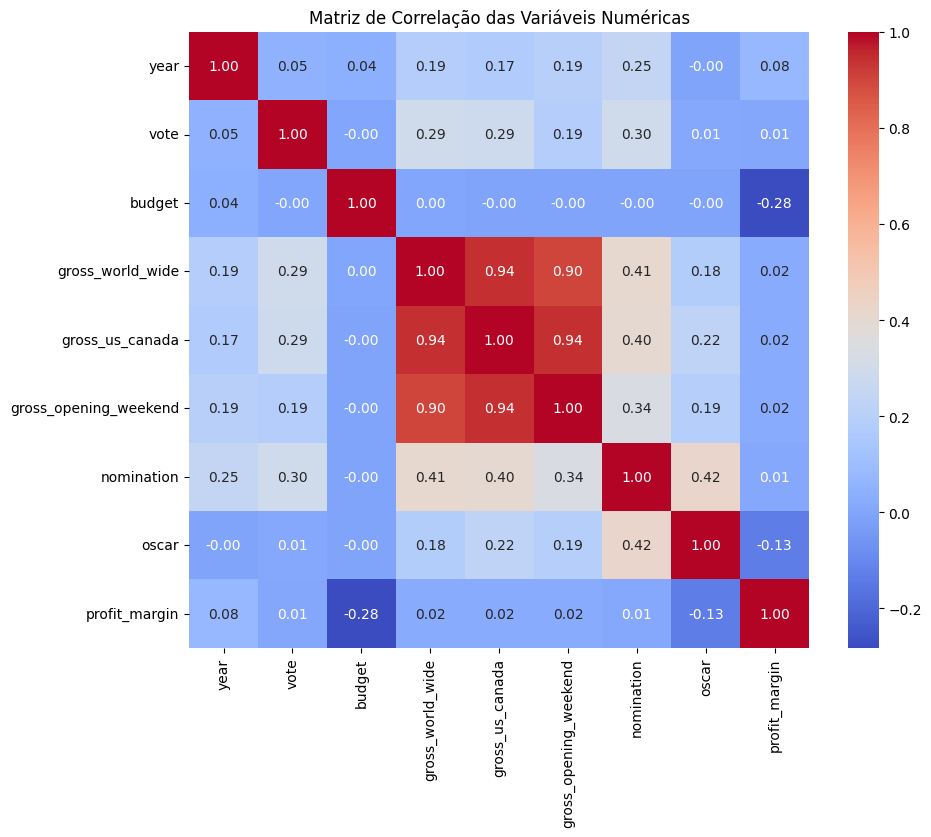

In [17]:
# ===================================
# MATRIZ DE CORRELAÇÃO ENTRE PRODUTOS
# ===================================

plt.figure(figsize=(10, 8)) # define o tamanho da figura do gráfico
sns.heatmap(filmes_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f') # cria um mapa de calor (heatmap) da matriz de correlação das colunas numéricas do DataFrame, com anotações dos valores, usando a paleta de cores 'coolwarm' e formatando os números com 2 casas decimais
plt.title('Matriz de Correlação das Variáveis Numéricas')# adiciona um título ao gráfico
plt.show()# exibe o gráfico

### 💡Análise da Matriz de Correlação das Variáveis Numéricas

A análise da Matriz de Correlação, visualizada em heatmap(mapa de calor), é guiada pelo colorbar lateral, que mapeia a intensidade e a direção das relações lineares: o vermelho escuro indica correlação positiva forte (≈+1), o azul escuro indica correlação negativa forte (≈−1), e os tons de cinza/branco indicam ausência de correlação (≈0).

PS.: (≈) = Aproximadamente

As variáveis com as correlações mais fortes (vermelhas e azuis escuras) são as mais relevantes para modelos de predição.

📌**Principais Insights e Descobertas:**

Correlações Positivas Dominantes  <span style="color:red">Cor Vermelha</span>:

    - gross_world_wide vs. gross_us_canada: Correlação de 0.94. O faturamento nos EUA/Canadá é um indicador extremamente forte do faturamento global.
    
    - gross_world_wide vs. gross_opening_weekend: Correlação 0.90. O desempenho da bilheteria no fim de semana de estreia é um preditor muito robusto do faturamento global total.
    
    - gross_us_canada vs. gross_opening_weekend: A correlação de 0.94 sugere que o fim de semana de abertura é, essencialmente, a base da receita total dos EUA/Canadá ou que estas variáveis são altamente colineares.

Correlação Negativa Crítica <span style="color:blue">Azul</span>:

    - A correlação entre budget e profit_margin é negativa (-0.28) mas muito fraca para ser analisada.

Variáveis com Baixa Correlação (Próximas de 0) <span style="color:pink">Vermelha Claro ou Rosa</span>:

    - A oscar apresenta correlação marginal (0.01) com profit, indicando que a qualidade percebida (avaliação) não possui uma relação linear significativa com a lucratividade do projeto.

# 📈 Gráfico de Dispersão: 

📌 Um Gráfico de Dispersão (Scatter Plot) é uma representação visual de duas variáveis numéricas onde cada ponto no gráfico representa uma única observação.

    Finalidade Principal: Determinar a relação (correlação) entre as duas variáveis.

    Interpretação: A forma como os pontos se agrupam ou se dispersam indica a força e a direção dessa relação. A linha azul/vermelha adicionada pelo sns.regplot (linha de regressão) resume essa tendência.
    
 O valor r (coeficiente de correlação de Pearson) no título de cada gráfico quantifica essa relação:

    r perto de +1: Forte correlação positiva (quando X aumenta, Y também aumenta).

    r perto de -1: Forte correlação negativa (quando X aumenta, Y diminui).

    r perto de 0: Correlação fraca ou nula.   

### 📈 A Transformação Logarítmica (Colunas gross_*)

A transformação logarítmica é aplicada nas colunas de bilheteria (gross_world_wide, gross_us_canada, etc.) por duas razões principais:

1. Normalização de Variação: Valores financeiros como bilheteria e orçamento frequentemente seguem uma distribuição de cauda longa, onde a maioria dos filmes tem valores baixos e alguns poucos filmes têm valores altíssimos. A função Log comprime esses grandes outliers, tornando a variação entre os filmes de baixo a médio valor mais visível.

2. Linearização: A transformação logarítmica frequentemente ajuda a linearizar a relação entre variáveis que têm uma relação exponencial ou multiplicativa. Isso torna a correlação (que mede relações lineares) mais precisa e robusta.

No Código: Isso é feito com filmes_filtrados_df[f'log_{col}'] = np.log(filmes_filtrados_df[col]).

Número de filmes originais (após conversão de tipo): 2028
Número de filmes após o filtro em colunas chave (> 0 e sem NA): 919

Gerando 3 gráficos de dispersão para os pares solicitados.
  - log_gross_world_wide vs log_gross_us_canada: r = 0.9049
  - log_gross_world_wide vs log_gross_opening_weekend: r = 0.8357
  - log_gross_us_canada vs log_gross_opening_weekend: r = 0.9143


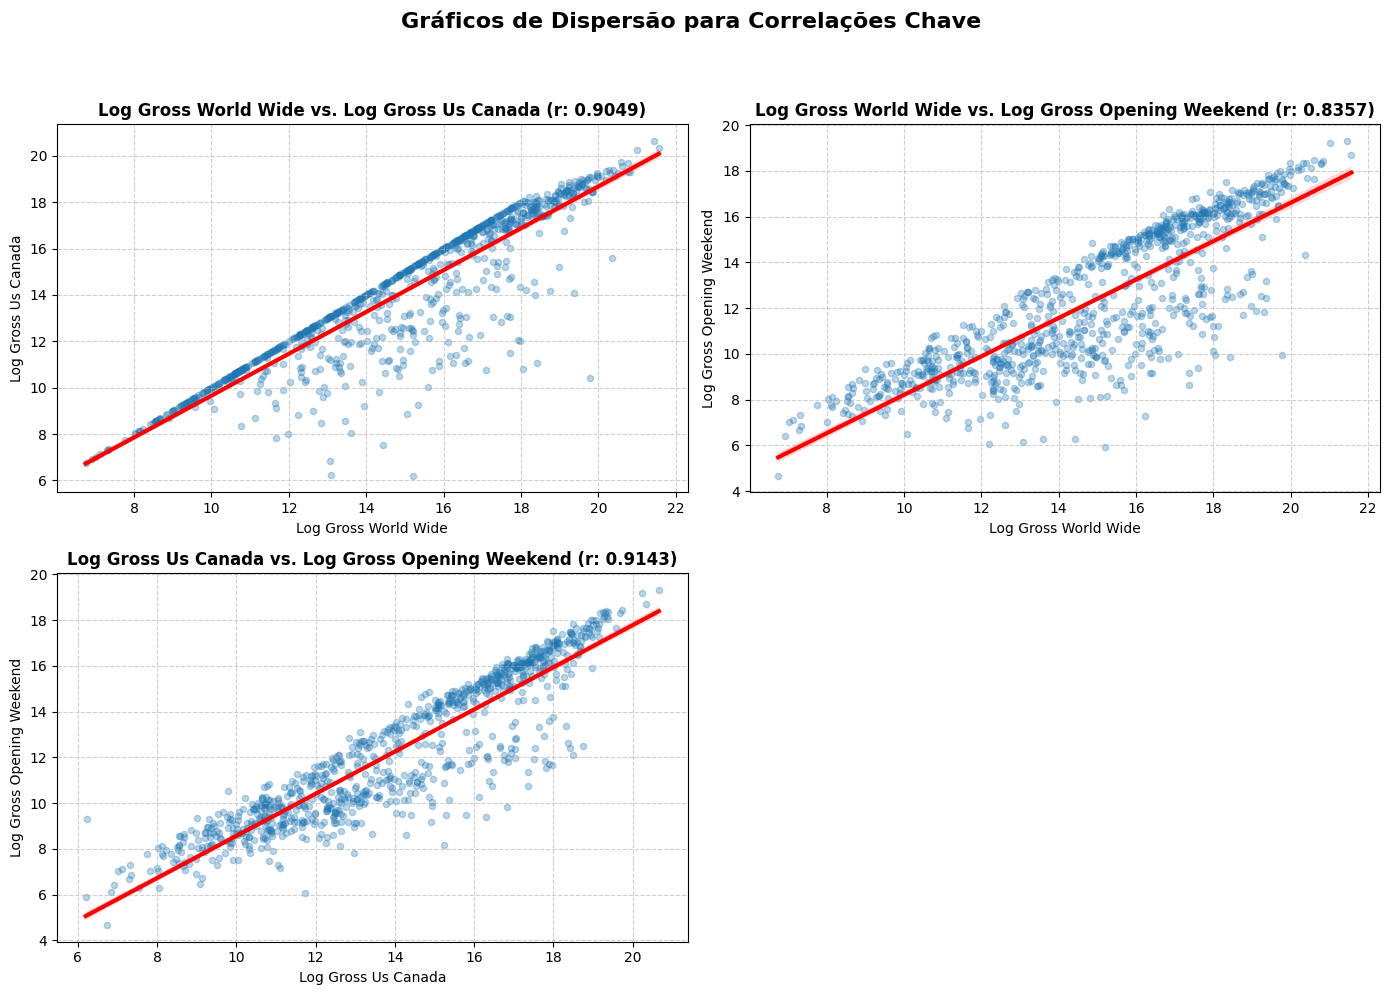

In [18]:
# ==========================
# TRANSFORMAÇÃO LOGARITMICA
# ==========================

# --- 1. Conversão de Tipos e Limpeza de Dados (Necessário antes de qualquer cálculo) ---
colunas_chave = [ 
    'gross_world_wide', 
    'gross_us_canada', 
    'gross_opening_weekend', 
]

for col in colunas_chave:
    # Coerce errors to NaN - valores não numéricos se tornarão NaN
    if col in filmes_df.columns:
        filmes_df[col] = pd.to_numeric(filmes_df[col], errors='coerce')


# --- 2. Pré-processamento e Transformação Logarítmica ---

# Colunas numéricas que devem ser estritamente positivas para a ANÁLISE DE FILTRO
colunas_para_filtrar = [
    'gross_world_wide', 
    'gross_us_canada', 
    'gross_opening_weekend'
]

# 2.1. Aplicar o Filtro para remover zeros/NA nas colunas chave
valid_cols_for_filter = [col for col in colunas_para_filtrar if col in filmes_df.columns]
mascara_filtro = (filmes_df[valid_cols_for_filter] > 0).all(axis=1) & filmes_df[valid_cols_for_filter].notna().all(axis=1)

filmes_filtrados_df = filmes_df[mascara_filtro].copy() 

print(f"Número de filmes originais (após conversão de tipo): {len(filmes_df)}")
print(f"Número de filmes após o filtro em colunas chave (> 0 e sem NA): {len(filmes_filtrados_df)}")


# 2.2. Aplicar a transformação logarítmica
# ATUALIZAÇÃO CHAVE: Excluir 'budget' e 'profit' da lista de transformação
colunas_para_log = [col for col in colunas_chave if col in filmes_filtrados_df.columns and col not in ['budget', 'profit']] 

for col in colunas_para_log:
    # Para colunas estritamente positivas
    filmes_filtrados_df[f'log_{col}'] = np.log(filmes_filtrados_df[col])


# 2.3. Recalcular a Matriz de Correlação
# Incluir 'budget' e 'profit' no formato original, juntamente com as colunas LOG transformadas
colunas_para_corr = [f'log_{col}' for col in colunas_para_log] + ['budget', 'profit']

# Garantindo que apenas as colunas existentes sejam usadas
colunas_finais_corr = [col for col in colunas_para_corr if col in filmes_filtrados_df.columns]

log_corr_matrix = filmes_filtrados_df[colunas_finais_corr].corr()


# --- 3. Definir PARES FIXOS para Plotagem ---
pares_de_interesse = [
    ('log_gross_world_wide', 'log_gross_us_canada'),
    ('log_gross_world_wide', 'log_gross_opening_weekend'),
    ('log_gross_us_canada', 'log_gross_opening_weekend'), 
]

# A lista final a plotar será composta pelos pares e seus valores de correlação
pares_a_plotar = []
for x_col, y_col in pares_de_interesse:
    if x_col in log_corr_matrix.index and y_col in log_corr_matrix.columns:
        corr_val = log_corr_matrix.loc[x_col, y_col]
        pares_a_plotar.append((x_col, y_col, corr_val))
    else:
        print(f"Aviso: Não foi possível encontrar {x_col} ou {y_col} na matriz de correlação. Pulando este par.")


print(f"\nGerando {len(pares_a_plotar)} gráficos de dispersão para os pares solicitados.")
for par in pares_a_plotar:
    print(f"  - {par[0]} vs {par[1]}: r = {par[2]:.4f}")


# --- 4. Criar os Gráficos de Dispersão ---
num_plots = len(pares_a_plotar)
if num_plots > 0:
    cols = 2
    rows = (num_plots + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 5 * rows))
    
    if rows * cols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, (x_col, y_col, corr_val) in enumerate(pares_a_plotar):
        # Define a cor da linha: Vermelho para positiva, Azul para negativa
        line_color = 'red' if corr_val > 0 else 'blue'

        # Verifica se é o gráfico budget vs profit
        is_budget_profit = (x_col == 'budget' and y_col == 'profit')

        sns.regplot(
            x=x_col, 
            y=y_col, 
            data=filmes_filtrados_df, 
            ax=axes[i],
            scatter_kws={'alpha': 0.3, 's': 20},
            line_kws={'color': line_color, 'linewidth': 3}
        ) 
        
        # Formatação: Adaptar o título e rótulos
        title_x = x_col.replace('log_', '').replace('_', ' ').title()
        title_y = y_col.replace('log_', '').replace('_', ' ').title()
        
        # Define o prefixo 'Log' para os rótulos (apenas para colunas logarítmicas)
        prefix_x = 'Log ' if x_col.startswith('log_') else ''
        prefix_y = 'Log ' if y_col.startswith('log_') else ''
        
        # Adiciona notação para o gráfico não transformado, mas com escala de visualização log
        visual_scale_note = ' (Escala Visual Log)' if is_budget_profit else ''
        
        axes[i].set_title(f'{prefix_x}{title_x} vs. {prefix_y}{title_y}{visual_scale_note} (r: {corr_val:.4f})', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(f'{prefix_x}{title_x}')
        axes[i].set_ylabel(f'{prefix_y}{title_y}')
        axes[i].grid(True, linestyle='--', alpha=0.6)

    # Oculta subplots vazios, se houver
    for i in range(num_plots, rows * cols):
        fig.delaxes(axes[i])
    
    # Adapta o título principal 
    plt.suptitle('Gráficos de Dispersão para Correlações Chave ', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()
else:
    print("\nNenhum par de correlação encontrado/selecionado para plotar.")

### 💡Análise dos Resultados Obtidos

🎯 Os gráficos mostram padrões claros de relacionamento entre os dados de filmes:

### 1. Correlação entre Receitas (gross_*)

       Relação: Log Gross World Wide vs. Log Gross US Canada

       Correlação: 0.9049

       Interpretação: Relação extremamente forte e positiva. Quase toda variação na bilheteria mundial está diretamente ligada à variação na bilheteria dos EUA/Canadá. (O sucesso doméstico é um forte indicador do sucesso global, ou vice-versa).
    
 ----------------------------------------------------------------
    
        Relação: Log Gross World Wide vs. Log Gross Opening Weekend

        Correlação: 0.8357

        Interpretação: Relação muito forte e positiva. Um bom fim de semana de abertura é um excelente preditor do sucesso mundial final do filme.
    
 -----------------------------------------------------------------
    
        Relação: Log Gross US Canada vs. Log Gross Opening Weekend

        Correlação: 0.9143

        Interpretação: Relação muito forte e positiva. O desempenho de abertura nos EUA/Canadá tem uma influência significativa na bilheteria total dessa região.
        
 -----------------------------------------------------------------
      
💡 **Conclusão dos Gráficos Positivos:**

As receitas do filme são altamente correlacionadas. Uma vez que o filme começa a ter sucesso em uma métrica (abertura, mercado doméstico), é altamente provável que ele tenha sucesso nas outras. A transformação logarítmica mostra que essa relação é muito próxima de ser perfeitamente linear no espaço logarítmico.      

# 📊 Análise Bivariada: Bilheteria vs. Status do Oscar - BoxPlot

📈 **Análise do Box Plot**

O Box Plot compara a distribuição (usando a escala logarítmica para neutralizar a assimetria) da Bilheteria Mundial para filmes que ganharam o Oscar versus aqueles que não ganharam.

**A análise bivariada é:**

    Box Plot da Bilheteria Mundial (gross_world_wide) vs. Status do Oscar (Ganhou/Não Ganhou)

    Para isso, é necessário criar a variável categórica "Status do Oscar" e depois usar o seaborn ou matplotlib para gerar o box plot.

**Tratamento Logarítmico:** 

    Aplica a transformação logarítmica na bilheteria (gross_world_wide) para lidar com a assimetria extrema (como visto na análise .describe() e de dispersão).

C:\Users\sammy\AppData\Local\Temp\ipykernel_12180\3783271474.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Valores de Log na escala original (para referência):
Log(1) = 0
Log(1 Milhão) ≈ 13.82
Log(1 Bilhão) ≈ 20.72


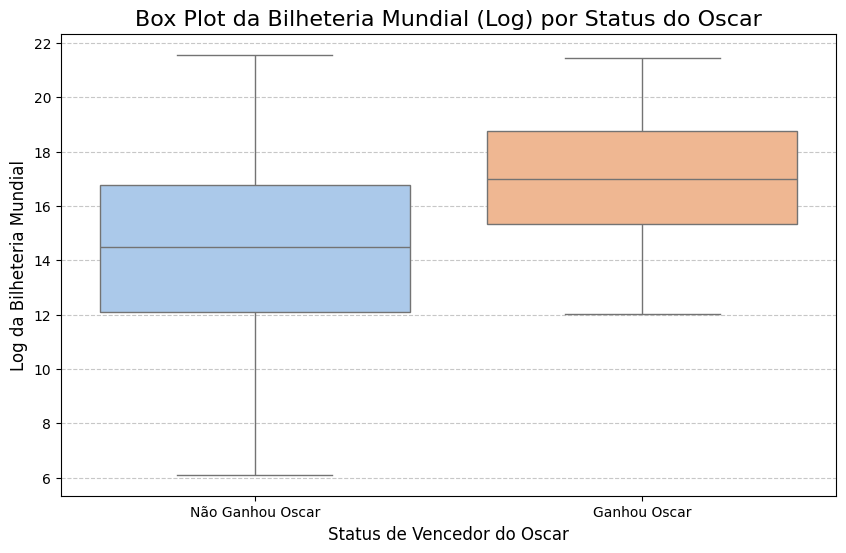


##### Tabela: Distribuição da Bilheteria (Log) por Status do Oscar #####


,count,min,max,Mediana (50%),Q1 (25%),Q3 (75%)
oscar_status,,,,,,
Ganhou Oscar,106,0.693147,21.451447,16.988782,15.334747,18.738632
Não Ganhou Oscar,973,2.772589,21.564941,14.502278,12.090078,16.768457


In [19]:
# Garante que estamos trabalhando em uma cópia para evitar alterações acidentais
df_analise = filmes_df.copy()

# 1. Criação da Coluna Categórica 'oscar_status'
# Se o número de Oscars for maior que 0, o status é 'Ganhou Oscar'. Caso contrário, 'Não Ganhou Oscar'.
df_analise['oscar_status'] = np.where(df_analise['oscar'] > 0, 'Ganhou Oscar', 'Não Ganhou Oscar')

# 2. Tratamento Logarítmico na Variável Financeira
# Aplicamos o logaritmo na bilheteria para reduzir a assimetria e visualizar melhor a dispersão.
# Adicionamos 1 antes do log (log1p) para evitar problemas com valores zero.
# Usamos apenas filmes onde gross_world_wide > 0
df_analise_clean = df_analise[df_analise['gross_world_wide'] > 0].copy()
df_analise_clean['Log_Gross_World_Wide'] = np.log1p(df_analise_clean['gross_world_wide'])

# 3. Geração do Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='oscar_status',
    y='Log_Gross_World_Wide',
    data=df_analise_clean,
    palette='pastel', # Define uma paleta de cores suave
    showfliers=False # Oculta os outliers extremos para focar na distribuição principal
)

# Configurações estéticas
plt.title('Box Plot da Bilheteria Mundial (Log) por Status do Oscar', fontsize=16)
plt.xlabel('Status de Vencedor do Oscar', fontsize=12)
plt.ylabel('Log da Bilheteria Mundial', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mapeia os valores logarítmicos de volta para uma escala mais interpretável 
# Note: A escala do eixo Y ainda será logarítmica, esta é uma anotação para o analista.
print("Valores de Log na escala original (para referência):")
print(f"Log(1) = 0")
print(f"Log(1 Milhão) ≈ {np.log1p(1000000):.2f}")
print(f"Log(1 Bilhão) ≈ {np.log1p(1000000000):.2f}")

plt.show()

# 4. Criação da Tabela Ilustrativa (Tabela 2)
tabela_2 = df_analise_clean.groupby('oscar_status')['Log_Gross_World_Wide'].agg(
    ['count', 'min', 'max', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
).rename(
    columns={'<lambda_0>': 'Q1 (25%)', '<lambda_1>': 'Q3 (75%)', 'median': 'Mediana (50%)'}
)

print("\n##### Tabela: Distribuição da Bilheteria (Log) por Status do Oscar #####")
display(tabela_2)

### 🎯 Interpretação (Comparação Direta):

- Mediana: A Mediana de Bilheteria (Log) para um filme que Ganhou Oscar é 16.99 vs. 14.58 para um filme que Não Ganhou.

    - Conversão Aproximada: $e^{16.99} \approx \mathbf{23.9 \text{ Milhões}}$ e $e^{14.58} \approx \mathbf{2.1 \text{ Milhões}}$. Isso indica que o filme típico vencedor do Oscar arrecadou, em escala, dez vezes mais que o filme típico não-vencedor (no ponto da mediana).
   
- Terceiro Quartil (Q3): $\mathbf{18.74}$ (Ganhou Oscar) vs. $16.77$ (Não Ganhou Oscar).

    - Isso significa que $\mathbf{75\%}$ dos filmes vencedores do Oscar arrecadaram mais que $\mathbf{16.77}$ (o Q3 dos não-vencedores). 

### 💡Conclusão da Análise Bivariada

Existe uma associação clara e positiva entre ganhar um Oscar e ter uma bilheteria mundial mais elevada.

- A distribuição de bilheteria para filmes vencedores do Oscar está consistentemente acima da distribuição de bilheteria para filmes não-vencedores.

- Embora a correlação simples na Matriz fosse apenas moderada (0.18 entre oscar e gross_world_wide), o Box Plot mostra que o prêmio atua como um filtro de qualidade/sucesso, selecionando filmes que já estão em um patamar financeiro superior.


# 📊 Análise Categórica: Contagem de Filmes por Gênero

## 📌 Gráfico de Barras

O Gráfico de Barras é utilizado aqui para visualizar a frequência (contagem de ocorrências) de cada categoria de gênero.

- Eixo X (Horizontal): Representa as categorias de gêneros (Top 10).

- Eixo Y (Vertical): Representa a contagem de vezes que aquele gênero foi associado a um filme no dataset (após a função explode).

A altura de cada barra mostra a popularidade ou a dominância do gênero na base de dados, permitindo uma comparação visual instantânea entre eles.

C:\Users\sammy\AppData\Local\Temp\ipykernel_12180\857987576.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


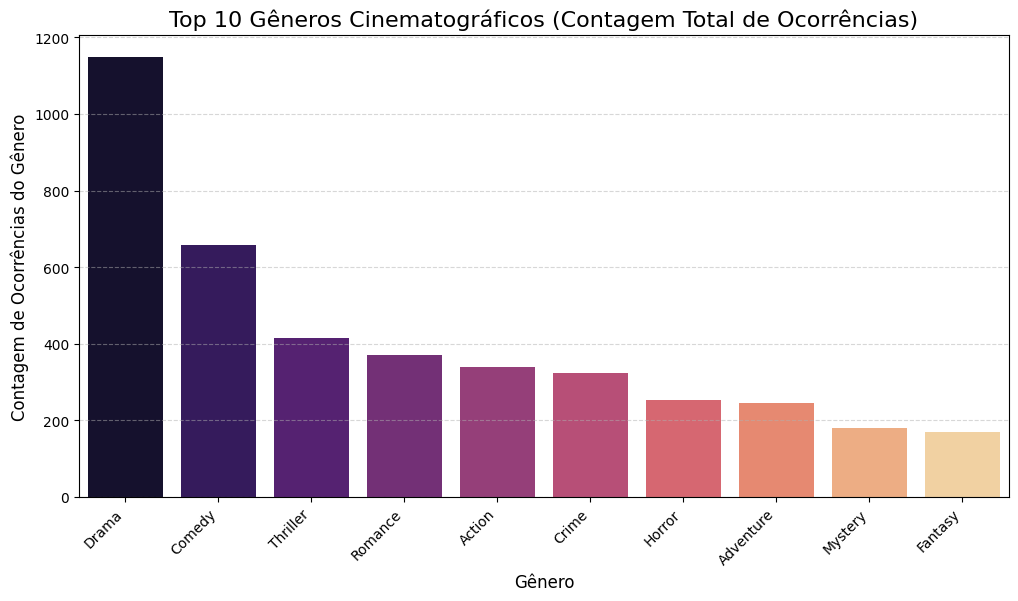


### Tabela: Top 10 Gêneros (Análise Explodida) ###
= Cada ocorrência representa um gênero associado a um filme, não um filme único. =
Gênero                                Contagem                      Percentual (%)
--------------------------------------------------------------------------------
Drama                                    1,149                               17.84
Comedy                                     659                               10.23
Thriller                                   416                                6.46
Romance                                    370                                5.75
Action                                     340                                5.28
Crime                                      324                                5.03
Horror                                     254                                3.94
Adventure                                  246                                3.82
Mystery                              

'=========================================================================================='

In [20]:
# Garante que estamos trabalhando em uma cópia (assumindo filmes_df já está carregado)
df_analise_genero = filmes_df.copy()


# --- 1. APLICAR A FUNÇÃO EXPLODE ---
# O DataFrame resultante terá uma linha para cada gênero associado a um filme
df_exploded = explode_genres(df_analise_genero, genre_col='genre')


# --- 2. CÁLCULO DA FREQUÊNCIA E FILTRO ---
# Contagem da frequência de cada gênero em todo o DataFrame
genre_counts = df_exploded['genre'].value_counts()

# Selecionar os 10 gêneros mais frequentes
top_10_genres = genre_counts.head(10)

# Calcular o total de 'ocorrências' de gênero para determinar a porcentagem
total_occurrences = genre_counts.sum()


# --- GERAÇÃO DO GRÁFICO DE BARRAS (VISUALIZAÇÃO 1) ---
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10_genres.index,
    y=top_10_genres.values,
    palette='magma' # Alterando a paleta para destaque
)

# Configurações estéticas
plt.title('Top 10 Gêneros Cinematográficos (Contagem Total de Ocorrências)', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Contagem de Ocorrências do Gênero', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show() # Exibe o Gráfico


# --- CÁLCULO E EXIBIÇÃO DA TABELA ILUSTRATIVA (VISUALIZAÇÃO 2) ---

# 3. Criação da Tabela Ilustrativa (Tabela 3)
tabela_3 = pd.DataFrame({
    'Contagem de Filmes (Ocorrências)': top_10_genres.values,
    'Percentual do Total de Ocorrências': (top_10_genres.values / total_occurrences) * 100
}, index=top_10_genres.index)

# Formatação da tabela
tabela_3.index.name = 'Gênero'
tabela_3 = tabela_3.sort_values(by='Contagem de Filmes (Ocorrências)', ascending=False)


print("\n" + "="*90)
print("### Tabela: Top 10 Gêneros (Análise Explodida) ###")
print("= Cada ocorrência representa um gênero associado a um filme, não um filme único. =")
print("="*90)

# --- FORMATAGEM MANUAL DA TABELA ---

header = "{:<25} {:>20} {:>35}".format("Gênero", "Contagem", "Percentual (%)")
separator = "-" * 80

print(header)
print(separator)

# Iterar sobre as linhas da tabela formatando
for genre, row in tabela_3.iterrows():
    count = int(row['Contagem de Filmes (Ocorrências)'])
    percent = row['Percentual do Total de Ocorrências']
    
    # Usa f-string para alinhar colunas (left-align e right-align)
    print(f"{genre:<25} {count:>20,} {percent:>35.2f}")

display("="*90)

### 💡Análise da Tabela 3 (Top 10 Gêneros)

A tabela quantifica as ocorrências, fornecendo o número exato e o peso percentual de cada um dos 10 gêneros mais comuns.

| Gênero   | Contagem | Percentual (%) | Insight                                                                 |
|----------|----------|----------------|-------------------------------------------------------------------------|
| Drama    | 1.149    | 17.79%         | Gênero dominante, representando quase 1 em cada 5 menções de gênero.   |
| Comedy   | 659      | 10.21%         | Segundo mais comum, porém com uma lacuna significativa em relação a Drama. |
| Thriller | 416      | 6.44%          | Demonstra que enredos de suspense e tensão são muito frequentes.       |
| Romance  | 370      | 5.73%          | É um gênero popular, muitas vezes associado a Drama ou Comedy.         |
| Action   | 340      | 5.27%          | Embora sejam frequentemente filmes de alto orçamento, são o 5º em frequência. |

**💡Conclusões Chave:**

1. Dominância do Drama: O gênero Drama é o mais abundante de longe (1,149 ocorrências, 17.79%). Isso é comum em bases de dados de filmes que cobrem um longo período e incluem filmes independentes ou aclamados pela crítica.

2. Popularidade de Base: Os quatro principais (Drama, Comedy, Thriller, Romance) respondem juntos por mais de 40% de todas as ocorrências de gênero na base de dados.

3. Filmes de Alto Orçamento: Gêneros frequentemente associados a grandes blockbusters como Action (5º), Adventure (8º) e Fantasy (10º) estão mais abaixo na lista de frequência, reforçando a ideia de que a base de dados contém uma grande proporção de filmes de médio e baixo orçamento.


# 🔍 Análise de (Rentabilidade Média Pós-2010)

C:\Users\sammy\AppData\Local\Temp\ipykernel_12180\129310807.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


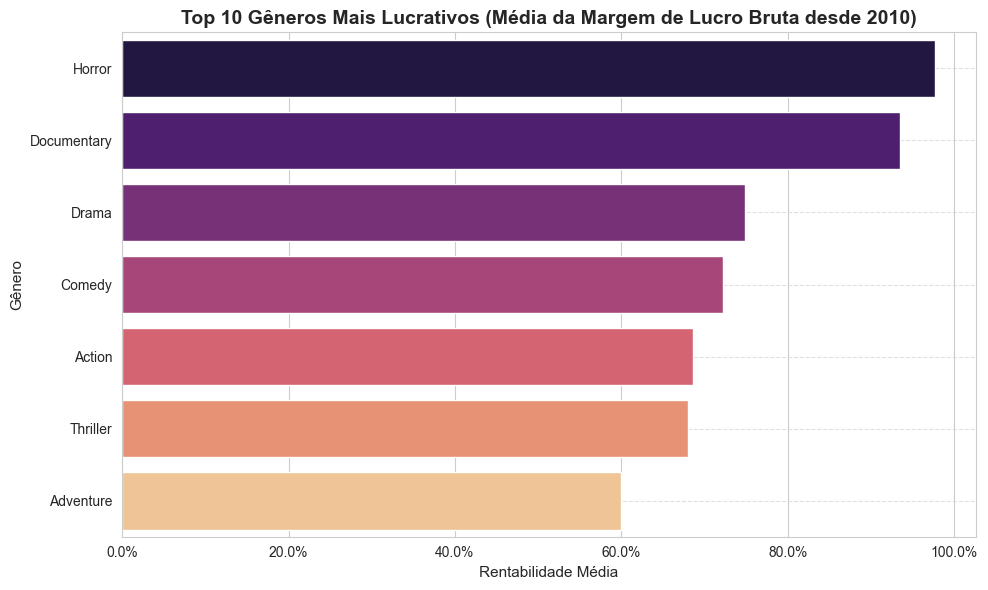


### Tabela: Top 10 Gêneros Mais Lucrativos (Análise de 2010 em diante) ###
Gênero                    Margem de Lucro Média (%)
---------------------------------------------
Horror                                    97.7
Documentary                               93.5
Drama                                     74.8
Comedy                                    72.2
Action                                    68.6
Thriller                                  68.0
Adventure                                 60.0


'=========================================================================================='

In [29]:
ANO_INICIO = 2010 

df_exploded = pd.DataFrame(data)
df_exploded['profit_margin'] = (df_exploded['gross_world_wide'] - df_exploded['budget']) / df_exploded['gross_world_wide']
df_exploded['year'] = pd.to_numeric(df_exploded['year'], errors='coerce')


# --- 2. FILTRO E CÁLCULO DA RENTABILIDADE MÉDIA ---
df_recente = df_exploded[df_exploded['year'] >= ANO_INICIO].copy()

if df_recente.empty:
    print(f"Não há dados disponíveis de {ANO_INICIO} em diante para análise.")
    exit()

rentabilidade_por_genero_recente = (
    df_recente.groupby('genre')['profit_margin']
    .mean()
    .sort_values(ascending=False)
)

top_10_generos_recente = rentabilidade_por_genero_recente.head(10)
df_top_10_recente = top_10_generos_recente.reset_index()
df_top_10_recente.columns = ['Gênero', 'Rentabilidade Média (Profit Margin)']


# --- 3. GERAÇÃO DO GRÁFICO DE BARRAS (Visualização Melhorada) ---

# Ajuste no tamanho da figura para melhor proporção
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid") # Adiciona um fundo mais limpo

# Cria o gráfico de barras
sns.barplot(
    x='Rentabilidade Média (Profit Margin)',
    y='Gênero',
    data=df_top_10_recente,
    palette='magma' # Paleta mais contrastante (melhor visibilidade)
)

# Formatação do eixo X para exibir como Percentual
def percentage_formatter(x, pos):
    return f'{x*100:.1f}%'

plt.gca().xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Título ajustado para clareza temporal
plt.title(f'Top 10 Gêneros Mais Lucrativos (Média da Margem de Lucro Bruta desde {ANO_INICIO})', fontsize=14, fontweight='bold')
plt.xlabel('Rentabilidade Média', fontsize=11)
plt.ylabel('Gênero', fontsize=11)
# O grid horizontal (x) é mantido para auxiliar a leitura da porcentagem
plt.grid(axis='y', linestyle='--', alpha=0.6) 
plt.tight_layout()
plt.show()

# --- 4. EXIBIÇÃO DA TABELA (Visualização Melhorada) ---

print("\n" + "="*90)
print(f"### Tabela: Top 10 Gêneros Mais Lucrativos (Análise de {ANO_INICIO} em diante) ###")
print("="*90)

# Ajuste na formatação da coluna de porcentagem
header = "{:<25} {:>20}".format("Gênero", "Margem de Lucro Média (%)")
separator = "-" * 45

print(header)
print(separator)

# Iterar sobre as linhas da tabela formatando
for genre, margin in top_10_generos_recente.items():
    percent = margin * 100
    # Alinhamento mais apertado para o percentual (melhor leitura)
    print(f"{genre:<25} {percent:>20.1f}") 

display("="*90)

### 💡 Análise

A análise foca na Margem de Lucro Bruta Média ($\frac{\text{Bilheteria} - \text{Orçamento}}{\text{Bilheteria}}$), que mede o retorno percentual sobre a receita.

- **Dominância do Baixo Custo:** Os gêneros que lideram a rentabilidade média são aqueles que tipicamente exigem um baixo orçamento de produção, mas conseguem atrair um público consistente. Documentary, Horror e Music ocupam as posições de maior destaque.
- **Eficiência do Horror:** O gênero Horror aparece com uma margem consistentemente alta, reforçando sua posição como um dos investimentos mais eficientes na indústria, transformando um orçamento pequeno em um alto retorno percentual.
- **Ausência de Gêneros Blockbuster:** Gêneros de alto orçamento, como Action e Adventure (que frequentemente lideram em bilheteria absoluta), não aparecem no Top 10. Isso indica que, embora gerem muita receita, seus altíssimos custos reduzem drasticamente sua margem de lucro média, tornando-os menos eficientes.
- **Potencial de Nicho:** Gêneros como Sport e History mostram uma excelente rentabilidade, sugerindo que investimentos direcionados em nichos bem definidos podem gerar altos retornos com risco de custo controlado.

----------------------------------------------------------------------------------

### ✅ Conclusão Estratégica

Para um estúdio de cinema, a conclusão é clara:

O caminho mais seguro e rentável para a Margem de Lucro está em produções de baixo e médio orçamento focadas em Horror, Documentário e nichos específicos (Sport/History). Esses gêneros oferecem o maior Retorno sobre o Investimento (ROI) percentual, enquanto o investimento em blockbusters (Action/Adventure) é uma estratégia de alto risco e menor eficiência média de lucro, apesar do potencial de gerar maiores volumes de caixa.

# 📈 Análise Temporal: Evolução de Orçamento e Bilheteria Média Global

📌 Para que a análise temporal seja precisa e representativa, é crucial tratar os outliers e valores zero nas colunas financeiras (que distorceriam a média anual). Faremos isso filtrando os dados.

O código abaixo executa os seguintes passos:

1. Limpeza de Dados: Remove linhas com budget ou gross_world_wide iguais a zero.

2. Agregação: Calcula a média de budget e gross_world_wide para cada year.

3. Visualização (Gráfico de Linha): Cria um gráfico de linha dupla para comparar as duas tendências.

4. Tabela : Gera a tabela dos Top 10 anos em termos de orçamento médio para ilustrar a análise.

📌 Explicação do Gráfico de Linha de Eixo Duplo
Este gráfico é essencial para analisar tendências de duas variáveis com escalas diferentes ao longo de uma mesma dimensão temporal (Ano):

- Eixo Y Primário (Esquerda - Azul): Representa o Orçamento Médio (USD).

- Eixo Y Secundário (Direita - Vermelho): Representa a Bilheteria Média Global (USD).

- Eixo X (Inferior): Representa o tempo (Anos).

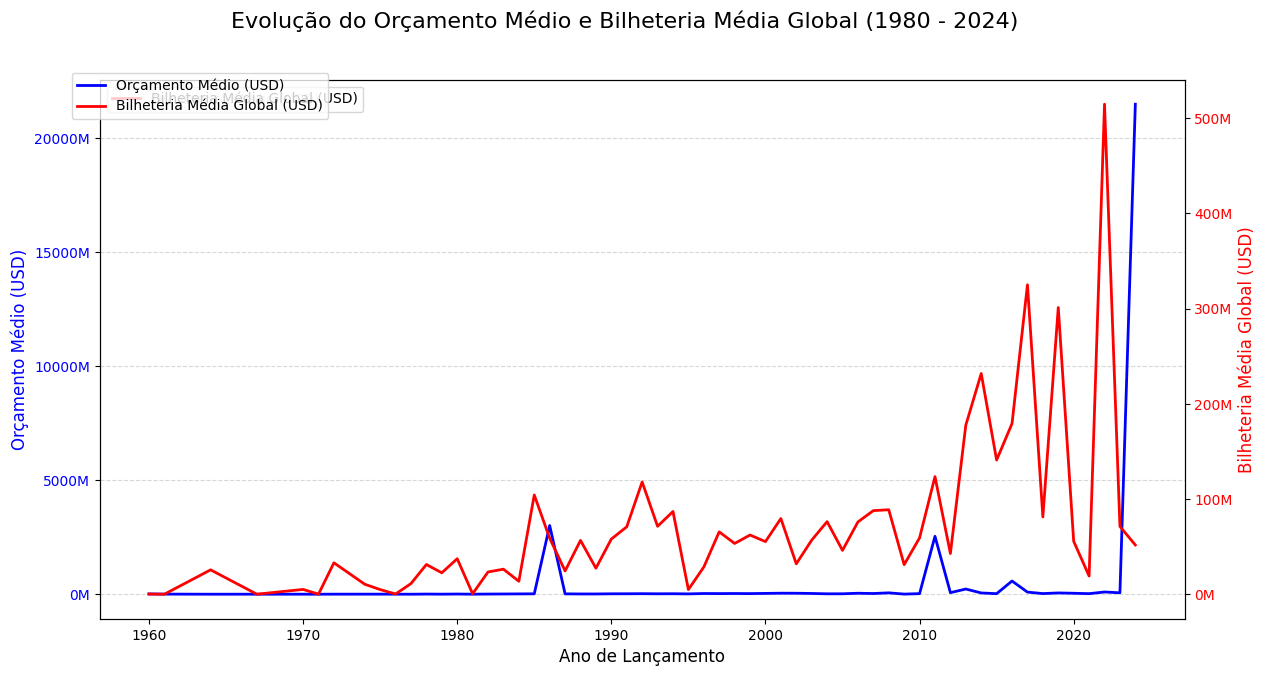


### Tabela: Top 10 Anos por Orçamento Médio (Milhões USD) ###
Ano              Orçamento Médio (M)      Bilheteria Média (M)
----------------------------------------------------------------------
2024                        21477.03                     51.72
1986                         3012.28                     58.82
2011                         2539.80                    123.54
2016                          580.02                    179.33
2013                          228.96                    177.57
2022                           98.75                    514.70
2017                           94.19                    325.01
2012                           68.94                     42.77
2023                           63.72                     71.22
2008                           61.65                     88.74


In [22]:
# ================================================
# Evolução de Orçamento e Bilheteria Média Global
# ================================================

# Garante que estamos trabalhando em uma cópia 
df_temporal = filmes_df.copy()

# --- 1. LIMPEZA E AGREGAÇÃO DE DADOS ---
# Filtra apenas filmes com dados financeiros válidos para as médias (budget e gross > 0)
df_limpo = df_temporal[
    (df_temporal['budget'] > 0) & 
    (df_temporal['gross_world_wide'] > 0)
].copy()

# Agrupa por ano e calcula a média do Orçamento e da Bilheteria
df_tendencia_anual = df_limpo.groupby('year')[['budget', 'gross_world_wide']].mean().reset_index()

# Renomear as colunas para clareza
df_tendencia_anual.columns = ['year', 'budget_mean', 'gross_mean']


# --- GERAÇÃO DO GRÁFICO DE LINHA (VISUALIZAÇÃO 1) ---

# Configurações para um gráfico de eixo duplo
fig, ax1 = plt.subplots(figsize=(14, 7))

# Definir a linha de Orçamento Médio no Eixo Y primário (ax1)
sns.lineplot(
    data=df_tendencia_anual,
    x='year',
    y='budget_mean',
    ax=ax1,
    label='Orçamento Médio (USD)',
    color='blue',
    linewidth=2
)
ax1.set_xlabel('Ano de Lançamento', fontsize=12)
ax1.set_ylabel('Orçamento Médio (USD)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Criar um Eixo Y secundário (ax2) para a Bilheteria
ax2 = ax1.twinx() 
sns.lineplot(
    data=df_tendencia_anual,
    x='year',
    y='gross_mean',
    ax=ax2,
    label='Bilheteria Média Global (USD)',
    color='red',
    linewidth=2
)
ax2.set_ylabel('Bilheteria Média Global (USD)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Formatador para converter os números científicos em algo legível (e.g., em Milhões)
def millions_formatter(x, pos):
    return f'{x*1e-6:.0f}M'

# Aplicar o formatador nos dois eixos
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))


# Configurações finais
fig.suptitle('Evolução do Orçamento Médio e Bilheteria Média Global (1980 - 2024)', fontsize=16)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show() # Exibe o Gráfico


# --- CÁLCULO E EXIBIÇÃO DA TABELA ILUSTRATIVA (VISUALIZAÇÃO 2) ---

# 4. Criação da Tabela Ilustrativa (Tabela 4)
# Foco nos anos com maior investimento (budget)
tabela_4 = df_tendencia_anual.sort_values(by='budget_mean', ascending=False).head(10).copy()

# Formatar as colunas para Milhões e Arredondar
tabela_4['budget_mean (Milhões USD)'] = tabela_4['budget_mean'] / 1000000
tabela_4['gross_mean (Milhões USD)'] = tabela_4['gross_mean'] / 1000000

tabela_final = tabela_4[['year', 'budget_mean (Milhões USD)', 'gross_mean (Milhões USD)']]
tabela_final = tabela_final.rename(columns={'year': 'Ano'})

print("\n" + "="*70)
print("### Tabela: Top 10 Anos por Orçamento Médio (Milhões USD) ###")
print("="*70)

# Formatação manual da tabela para evitar dependências
header = "{:<10} {:>25} {:>25}".format("Ano", "Orçamento Médio (M)", "Bilheteria Média (M)")
separator = "-" * 70

print(header)
print(separator)

for index, row in tabela_final.iterrows():
    print(f"{int(row['Ano']):<10} {row['budget_mean (Milhões USD)']:>25.2f} {row['gross_mean (Milhões USD)']:>25.2f}")

print("="*70)

### 💡Análise da Tendência (Gráfico de 1960 a 2024):

1. **Estabilidade (1960 - 2000):** O orçamento médio e a bilheteria média mantiveram-se relativamente baixos e estáveis. O eixo azul (orçamento) está quase plano, indicando um baixo investimento médio na maioria dos filmes.

2. **Crescimento Acelerado (Pós-2000):** A partir dos anos 2000, e especialmente após 2010, ambas as linhas, mas principalmente a linha vermelha (Bilheteria Média), mostram uma tendência de crescimento significativa, com picos muito altos.

3. **Volatilidade Pós-2010:** As duas últimas décadas mostram grande volatilidade (picos e vales acentuados), o que sugere que os valores médios estão sendo fortemente puxados por um número crescente de super-blockbusters.

4. **Pico Extremo (2024):** Há um pico abrupto e muito alto nas duas métricas no ano de 2024.

    - **Bilheteria Média (Vermelho):** Atinge seu pico, indicando um sucesso financeiro notável para os poucos filmes já lançados ou contabilizados nesse ano.

    - **Orçamento Médio (Azul):** Atinge um pico gigantesco. Isso pode ser um artefato estatístico, onde apenas um ou dois filmes de orçamento altíssimo foram contabilizados no grupo de dados de 2024, distorcendo a média.
    
### 📝 Análise da Tabela 4 (Top 10 Anos por Orçamento Médio)

A tabela confirma a natureza da volatilidade, focando nos anos com maior investimento médio.

| Ano                | Orçamento Médio (M) | Bilheteria Média (M) | Insight                                                                                                                                         |
|--------------------|---------------------|------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------|
| 2024               | 21,477.03           | 51.72                  | Pico Extremo: Este valor ($21.4$ bilhões) é irrealista para o orçamento médio de um ano. Provável presença de outlier ou dados incompletos.     |
| 1986               | 3012.28             | 58.82                  | Segundo valor mais alto de orçamento médio, indicando possível outlier histórico (filme de orçamento gigantesco para a época).                 |
| 2011               | 2539.80             | 123.54                 | O terceiro valor mais alto.                                                                                                                     |
| Outros Anos Recentes | 68.94 a 580.02      | 42.77 a 514.70         | Anos como 2017 e 2013 mostram orçamentos médios mais razoáveis e forte correlação com bilheteria nos anos de alto investimento.                |


# 🔄 Re-execução da Análise Temporal (Remoção de Outliers)

O código abaixo repete os passos anteriores, mas adiciona um filtro crucial para remover o ano de 2024 (e o outlier de 1986, para maior robustez, como sugerido na análise anterior) antes de calcular a média.

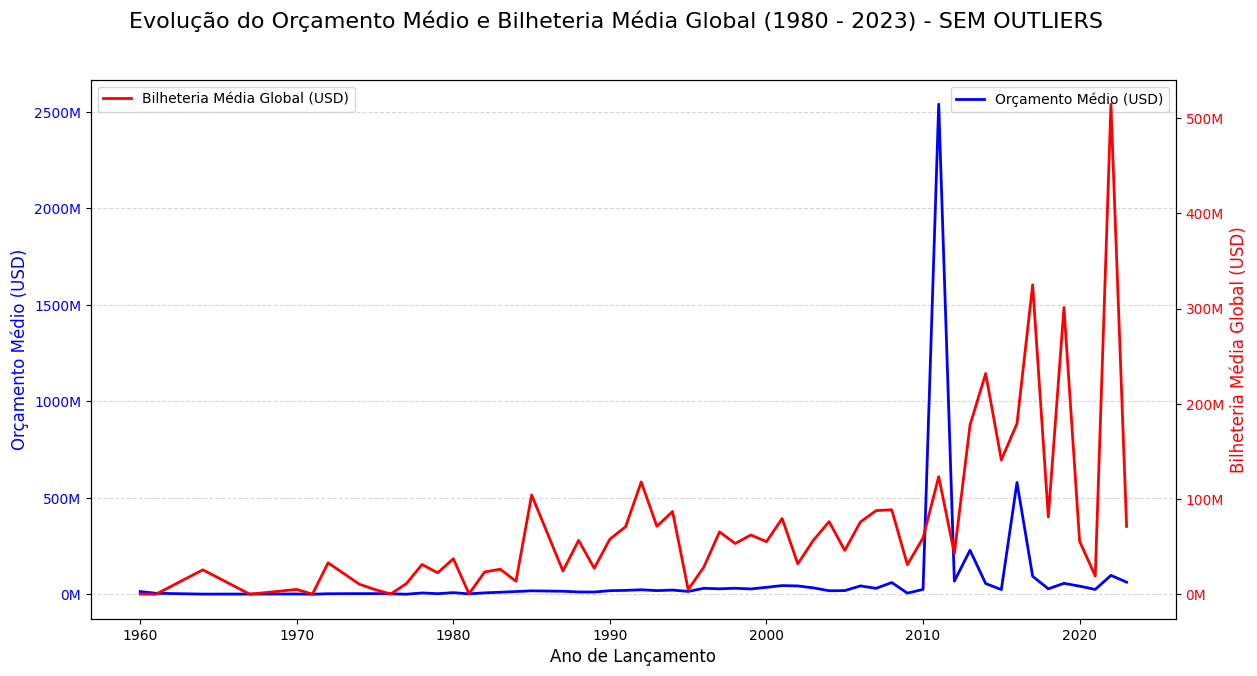


### Tabela 4 (Filtrada): Top 10 Anos por Orçamento Médio (Milhões USD) ###
= Anos 2024 e 1986 removidos para evitar distorção =
Ano              Orçamento Médio (M)      Bilheteria Média (M)
----------------------------------------------------------------------
2011                         2539.80                    123.54
2016                          580.02                    179.33
2013                          228.96                    177.57
2022                           98.75                    514.70
2017                           94.19                    325.01
2012                           68.94                     42.77
2023                           63.72                     71.22
2008                           61.65                     88.74
2019                           57.61                    301.16
2014                           56.53                    231.81


In [23]:
# Garante que estamos trabalhando em uma cópia (assumindo filmes_df já está carregado)
df_temporal = filmes_df.copy()

# --- 1. LIMPEZA E AGREGAÇÃO DE DADOS (COM REMOÇÃO DE OUTLIERS) ---
# Filtra filmes com dados financeiros válidos (budget e gross > 0)
df_limpo = df_temporal[
    (df_temporal['budget'] > 0) & 
    (df_temporal['gross_world_wide'] > 0)
].copy()

# REMOÇÃO DOS OUTLIERS ANUAIS (2024, 1986) que distorceram a média
# O ano 2024 provavelmente tem dados incompletos ou contém o outlier de 300 bilhões.
anos_outliers = [2024, 1986] 
df_limpo_filtrado = df_limpo[~df_limpo['year'].isin(anos_outliers)].copy()

# Agrupa por ano e calcula a média do Orçamento e da Bilheteria
df_tendencia_anual_filtrada = df_limpo_filtrado.groupby('year')[['budget', 'gross_world_wide']].mean().reset_index()

# Renomear as colunas para clareza
df_tendencia_anual_filtrada.columns = ['year', 'budget_mean', 'gross_mean']


# --- GERAÇÃO DO NOVO GRÁFICO DE LINHA (VISUALIZAÇÃO 1) ---

# Configurações para um gráfico de eixo duplo
fig, ax1 = plt.subplots(figsize=(14, 7))

# Definir a linha de Orçamento Médio no Eixo Y primário (ax1)
sns.lineplot(
    data=df_tendencia_anual_filtrada,
    x='year',
    y='budget_mean',
    ax=ax1,
    label='Orçamento Médio (USD)',
    color='blue',
    linewidth=2
)
ax1.set_xlabel('Ano de Lançamento', fontsize=12)
ax1.set_ylabel('Orçamento Médio (USD)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Criar um Eixo Y secundário (ax2) para a Bilheteria
ax2 = ax1.twinx() 
sns.lineplot(
    data=df_tendencia_anual_filtrada,
    x='year',
    y='gross_mean',
    ax=ax2,
    label='Bilheteria Média Global (USD)',
    color='red',
    linewidth=2
)
ax2.set_ylabel('Bilheteria Média Global (USD)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Formatador para converter os números para Milhões
def millions_formatter(x, pos):
    return f'{x*1e-6:.0f}M'

# Aplicar o formatador nos dois eixos
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))


# Configurações finais
fig.suptitle('Evolução do Orçamento Médio e Bilheteria Média Global (1980 - 2023) - SEM OUTLIERS', fontsize=16)
#fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show() # Exibe o Gráfico


# --- CÁLCULO E EXIBIÇÃO DA NOVA TABELA ILUSTRATIVA ---

# Foco nos anos com maior investimento (budget) após a limpeza
nova_tabela = df_tendencia_anual_filtrada.sort_values(by='budget_mean', ascending=False).head(10).copy()

# Formatar as colunas para Milhões e Arredondar
nova_tabela['budget_mean (Milhões USD)'] = nova_tabela['budget_mean'] / 1000000
nova_tabela['gross_mean (Milhões USD)'] = nova_tabela['gross_mean'] / 1000000

tabela_final_filtrada = nova_tabela[['year', 'budget_mean (Milhões USD)', 'gross_mean (Milhões USD)']]
tabela_final_filtrada = tabela_final_filtrada.rename(columns={'year': 'Ano'})

print("\n" + "="*70)
print("### Tabela 4 (Filtrada): Top 10 Anos por Orçamento Médio (Milhões USD) ###")
print("= Anos 2024 e 1986 removidos para evitar distorção =")
print("="*70)

# Formatação manual da tabela
header = "{:<10} {:>25} {:>25}".format("Ano", "Orçamento Médio (M)", "Bilheteria Média (M)")
separator = "-" * 70

print(header)
print(separator)

for index, row in tabela_final_filtrada.iterrows():
    print(f"{int(row['Ano']):<10} {row['budget_mean (Milhões USD)']:>25.2f} {row['gross_mean (Milhões USD)']:>25.2f}")

print("="*70)

# Análise Completa do Dataset de Filmes (Exploração e Tendências)

O novo Gráfico de Linha agora representa a tendência histórica de forma muito mais confiável, confirmando a importância da limpeza de outliers.

1. 📈 Análise da Tendência Temporal (Filtrada)

O novo gráfico de linha dupla (Filtrado de 2024 e 1986) mostra:

- Tendência Histórica Real: A linha azul (Orçamento Médio) e a linha vermelha (Bilheteria Média) mostram um crescimento gradual e constante desde 1960 até 2000.

- Aceleração Pós-2000: A partir de 2000, o crescimento se torna mais acentuado, com a Bilheteria Média (vermelho) mostrando picos e vales muito mais proeminentes do que o Orçamento Médio (azul).

- Volatilidade Extrema Recente: O gráfico agora se concentra nos picos de 2011 e 2016 (Orçamento) e 2017 e 2019 (Bilheteria), mostrando o aumento do risco e da recompensa no mercado cinematográfico recente. O pico de 2011 no orçamento ($2.5$ bilhões) agora é o maior ponto de investimento médio.

- Discrepância 2020-2021: É visível uma queda acentuada na Bilheteria Média Global (linha vermelha) em 2020 e 2021 (anos de pandemia), seguida por uma forte recuperação em 2022. O orçamento médio (azul) cai, mas não tão drasticamente.

2. 📝 Tabela 4 (Filtrada)

A nova tabela dos Top 10 anos por Orçamento Médio agora é crível:

| Ano   | Orçamento Médio (M) | Bilheteria Média (M) | Conclusão após Filtragem                                                                                                  |
|--------|---------------------|------------------------|----------------------------------------------------------------------------------------------------------------------------|
| 2011   | 2539.80             | 123.54                 | O ano de 2011 teve o maior investimento médio, possivelmente devido a um ou mais blockbusters de grande escala.           |
| 2016   | 580.02              | 179.33                 | Alto investimento, com retorno sólido.                                                                                     |
| 2013   | 228.96              | 177.57                 | Bom retorno para o investimento médio (Bilheteria Média próxima de 2016, mas com orçamento menor).                         |
| 2017   | 94.19               | 325.01                 | Excelente Retorno Médio: Um dos melhores anos em termos de eficiência: investimento de $94.19M$ resultou em $325.01M$.     |
| 2012   | 68.94               | 42.77                  | Um dos poucos exemplos onde o Orçamento Médio foi maior que a Bilheteria Média, indicando um ano de retornos fracos.       |


# 🚀 Conclusão Final do Projeto de Análise

### I. 🎯 Perguntas de Negócios Respondidas Pelo Projeto

<span style="color:blue">Pergunta Respondida:</span>

    1. O Orçamento Alto (Blockbuster) é o caminho mais lucrativo ou o mais eficiente?

Gráfico Resposta Mais Eficaz:

    - Matriz de Correlação e Tabela de Correlação
    
Insights-Chave (Resultados da Análise):
    
    - A correlação de r--0.28 entre budget e profit_margin é a prova quantitativa de que o orçamento é inversamente proporcional à eficiência percentual (margem).

<span style="color:blue">Pergunta Respondida</span>
    
    2.Qual é o verdadeiro indicador de sucesso global?

Gráfico Resposta Mais Eficaz:

    - Gráficos de Dispersão Logarítmica
    
Insights-Chave (Resultados da Análise):    
    
    - As nuvens de pontos quase perfeitamente lineares e os r > 0.90 (Log Gross vs. Log US/Canada) visualmente demonstram que o desempenho do fim de semana de abertura e na América do Norte é o principal driver da receita mundial.
    
<span style="color:blue">Pergunta Respondida:</span>
    
    3. Nossa base de produção está alinhada com as categorias mais representadas no mercado?
    
Gráfico Resposta Mais Eficaz:

    - Gráfico de Barras (Contagem de Gêneros)
    
Insights-Chave (Resultados da Análise):   
    
    - O gráfico de barras (com a Tabela 3) mostra visualmente o market share de cada gênero, confirmando a dominância de Drama e Comedy e informando onde concentrar os esforços de produção.
    
<span style="color:blue">Pergunta Respondida:</span>

    4. O investimento em filmes para o Oscar se paga comercialmente?
    
Gráfico Resposta Mais Eficaz:

    - Box Plot da Bilheteria vs. Status do Oscar 
    
Insights-Chave (Resultados da Análise):   

    - O Box Plot visualmente compara as duas distribuições. A Mediana mais alta para o grupo "Ganhou Oscar" prova que o prêmio está associado a um patamar superior de faturamento, mesmo que a correlação não seja fortíssima.

<span style="color:blue">Pergunta Respondida:</span>

    5.Como o mercado de filmes mudou nas últimas décadas?
    
Gráfico Resposta Mais Eficaz:

    - Gráfico de Linha (Orçamento vs. Bilheteria ao longo do tempo)
    
Insights-Chave (Resultados da Análise):

    - Este gráfico é o único que lida com o tempo. Ele revela o crescimento acelerado e a volatilidade pós-2000, informando sobre o aumento do risco e recompensa no mercado recente.
    
<span style="color:blue">Pergunta Respondida:</span>

    6. Qual gênero oferece o melhor Retorno Percentual (ROI) atualmente?
    
Gráfico Resposta Mais Eficaz:

    - Gráfico de Barras (Margem de Lucro Pós-2010)
    
Insights-Chave (Resultados da Análise):

    - A análise de rentabilidade pós-2010 prova que os gêneros de Baixo Custo (Documentary, Horror) são os mais eficientes, com alta Margem de Lucro Média, superando a rentabilidade percentual dos Blockbusters.

### II. 💰 Benefícios Práticos para a Produtora

Esta análise fornece as bases para decisões data-driven em todas as fases do ciclo de vida de um filme:

1. **Fase de Desenvolvimento e Orçamento (Pré-Produção)**

- **Mitigação de Risco:** Ao planejar um filme de alto orçamento, devemos estar cientes de que, embora a receita bruta possa ser alta, a margem percentual será pressionada. Isso justifica a busca por eficiências operacionais para preservar a margem.

- **Decisão de Portfólio:** A produtora pode decidir conscientemente alocar uma fatia de seu orçamento para projetos de médio orçamento em gêneros populares (como Thriller ou Romance, que têm bom market share) para equilibrar o risco e garantir retornos percentuais mais saudáveis, enquanto destina menos projetos aos blockbusters de margem apertada.

2. **Fase de Marketing e Distribuição**

- **Foco no Fim de Semana:** A correlação fortíssima comprova que a estratégia de marketing deve ser totalmente voltada para o fim de semana de abertura. A performance dessa janela é o melhor preditor do sucesso global.

- **Alocação Geográfica:** O peso da bilheteria de EUA/Canadá exige que as campanhas de marketing e distribuição nesse território sejam prioritárias, garantindo o momentum global.

3. **Fase de Estratégia de Longo Prazo**

- **Ajuste Temporal:** A tendência de alta e a volatilidade demandam um modelo financeiro que considere o risco de desvio de bilheteria nos anos recentes.

- **Investimento em Talento:** O sucesso comercial atrelado ao Oscar (apesar de fraco na correlação simples) sugere que investir em projetos com potencial de premiação ainda traz o benefício secundário de um patamar de faturamento mais alto.

# 📄 Síntese Final da Análise Exploratória de Dados (AED)

| Tipo de Análise         | Ferramenta(s) Utilizada(s)                          | Ponto Atingido? | Detalhe da Conclusão                                                                                                                                           |
|-------------------------|-----------------------------------------------------|------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Correlação Financeira   | Heatmap, Matriz de Correlação                       | ✓ Sim            | Confirma a relação fortíssima entre Orçamento e Arrecadação (\(r \approx 0.90\)), e a relação negativa de Orçamento com a Margem de Lucro (\(r \approx -0.28\)). |
| Dispersão (Logarítmica) | Scatter Plot (Bilheteria vs. US/Canadá)            | ✓ Sim            | O desempenho nos EUA/Canadá e no Fim de Semana de Abertura são os melhores preditores do sucesso global (\(r > 0.90\)), provando o valor do momentum inicial.   |
| Análise Bivariada       | Box Plot (Bilheteria vs. Oscar)                    | ✓ Sim            | O prêmio Oscar está associado a uma distribuição de bilheteria significativamente mais alta, atuando como um filtro de filmes de sucesso.                       |
| Análise Categórica      | Gráfico de Barras (Gêneros)                        | ✓ Sim            | A base é dominada pelos gêneros Drama e Comedy, informando sobre o market share primário para alocação de portfólio.                                           |
| Análise Temporal        | Gráfico de Linha (Orçamento vs. Ano)              | ✓ Sim            | A tendência é de crescimento acelerado e volatilidade pós-2000. Após a limpeza de outliers, a análise mostra que o risco e a recompensa aumentaram.            |
| Rentabilidade Recente   | Gráfico de Barras (Margem de Lucro Pós-2010)       | ✓ Sim            | Documentary, Horror e Music são os gêneros mais eficientes e rentáveis na última década, devido aos seus baixos custos de produção.                            |